In [27]:
# Import the TensorFlow library, commonly aliased as 'tf', for building and training neural networks.
import tensorflow as tf

# Import the NumPy library, commonly aliased as 'np', for numerical computations and array operations.
import numpy as np

# Import the Pandas library, commonly aliased as 'pd', for data manipulation and analysis.
import pandas as pd

# Import the Matplotlib library, specifically the pyplot module, for data visualization.
import matplotlib.pyplot as plt

# Import necessary libraries and functions from TensorFlow.
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization

In [28]:
# Import the MNIST dataset from the TensorFlow Keras datasets module.
from tensorflow.keras.datasets import mnist

# Import the to_categorical function from the TensorFlow Keras utils module.
# This function is used for one-hot encoding of categorical labels.
from tensorflow.keras.utils import to_categorical

# Import the clear_session function from the TensorFlow Keras backend module.
# This function is used to clear the Keras session and reset the TensorFlow graph.
from tensorflow.keras.backend import clear_session

# Import the Sequential and Model classes from the TensorFlow Keras models module.
# These classes are used to create sequential and functional API models, respectively.
from tensorflow.keras.models import Sequential, Model, load_model

# Import various layer classes (Reshape, Dense, BatchNormalization, LeakyReLU, Input)
# from the TensorFlow Keras layers module.
# These classes are used to define the architecture of neural network models.
from tensorflow.keras.layers import Reshape, Dense, BatchNormalization, LeakyReLU, Input

# Import callback classes (ModelCheckpoint, EarlyStopping) from the TensorFlow Keras callbacks module.
# These classes are used to define callbacks for monitoring and controlling the training process.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [29]:
# Download the MNIST dataset using the load_data() function from the mnist module.
# The dataset consists of handwritten digits (0 to 9) and is commonly used for image classification tasks.
# It returns training and testing data as tuples (X_train, y_train) and (X_test, y_test) respectively,
# where X_train and X_test are the input images and y_train and y_test are the corresponding labels.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Image Number: 5837


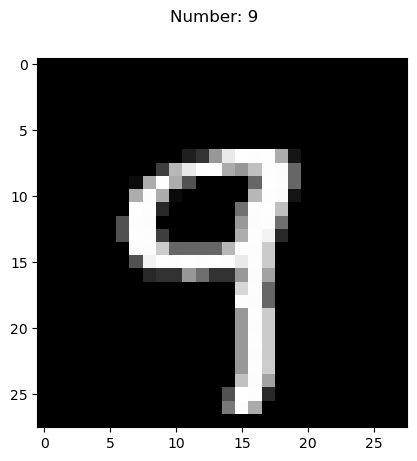

In [30]:
# Generate a random integer between 0 and the number of examples in the test dataset
img_num = np.random.randint(0, X_test.shape[0])

# Print the randomly selected image number
print("Image Number:", img_num)

# Display the randomly selected image from the test dataset in grayscale
plt.imshow(X_test[img_num], cmap='gray')

# Add a title to the plot indicating the corresponding label of the image
plt.suptitle('Number: ' + str(y_test[img_num]))

# Show the plot with the image
plt.show()

In [31]:
# Reshape the training and testing input images (X_train and X_test) from 2D arrays (28x28 pixels)
# to 1D arrays (784 pixels) using the reshape() method. This flattens each image into a single vector.
# The argument (-1, 28*28) specifies the new shape, where -1 indicates that the number of rows (samples)
# is inferred based on the size of the original array, and 28*28 is the total number of pixels in each image.
X_train = X_train.reshape(-1, 28*28).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28*28).astype("float32") / 255.0

# Convert pixel values of training and testing input images to floating-point numbers and normalize them
# by dividing by 255.0. This scales the pixel values to the range [0, 1], which helps improve the convergence
# and stability of the training process when using neural networks.
# The astype("float32") method converts the pixel values to 32-bit floating-point numbers.

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [33]:
# Print the shapes of the training and testing datasets to understand their dimensions.
# X_train.shape: Shape of the training input data (X_train).
# y_train.shape: Shape of the training labels (y_train).
# X_test.shape: Shape of the testing input data (X_test).
# y_test.shape: Shape of the testing labels (y_test).
print("Training Data - Input Shape:", X_train.shape)
print("Training Data - Label Shape:", y_train.shape)
print("Testing Data - Input Shape:", X_test.shape)
print("Testing Data - Label Shape:", y_test.shape)

Training Data - Input Shape: (60000, 784)
Training Data - Label Shape: (60000,)
Testing Data - Input Shape: (10000, 784)
Testing Data - Label Shape: (10000,)


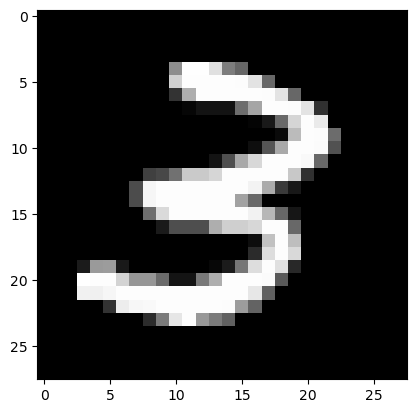

In [34]:
# Reshape the image data back to its original shape (28x28)
image = X_train[3707].reshape(28, 28)

# Display the image using plt.imshow()
plt.imshow(image, cmap='gray')
plt.show()

In [35]:
# Obtain the label for a specific example in the test set.
# Here, y_train[3707] retrieves the label corresponding to the example at index 3707 in the test set.
example_label = y_train[3707]

# Print the label of the example.
print("Label for example at index 3707 in the test set:", example_label)

Label for example at index 3707 in the test set: 3


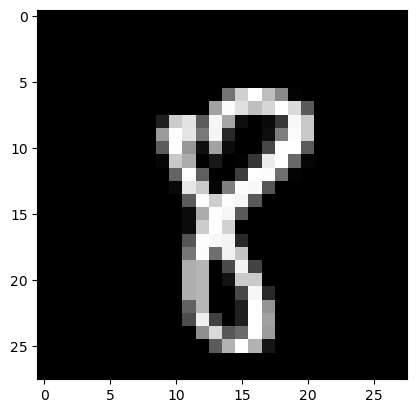

In [36]:
# Reshape the image data back to its original shape (28x28)
image = X_test[3707].reshape(28, 28)

# Display the image using plt.imshow()
plt.imshow(image, cmap='gray')
plt.show()

In [37]:
# Obtain the label for a specific example in the test set.
# Here, y_test[3707] retrieves the label corresponding to the example at index 3707 in the test set.
example_label = y_test[3707]

# Print the label of the example.
print("Label for example at index 3707 in the test set:", example_label)

Label for example at index 3707 in the test set: 8


In [38]:
# Convert the training and testing labels (y_train and y_test) to one-hot encoded format using the to_categorical function
# from the TensorFlow Keras utils module. One-hot encoding converts categorical integer labels (0 to 9) into binary vectors
# with a length equal to the number of classes (10 in this case), where a 1 is placed in the index corresponding to the class label,
# and 0s elsewhere.
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# The num_classes parameter specifies the total number of classes for one-hot encoding, which is set to 10 for the MNIST dataset.

In [39]:
# Obtain the one-hot encoded label for a specific example in the test set.
# Here, y_test[3707] retrieves the one-hot encoded label corresponding to the example at index 3707 in the test set.
example_label_one_hot = y_test[3707]

# Print the one-hot encoded label of the example.
print("One-hot encoded label for example at index 3707 in the test set:", example_label_one_hot)

One-hot encoded label for example at index 3707 in the test set: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [40]:
### version -3 ###
# Clear any existing TensorFlow graph/session.
clear_session()

# Define the input layer with a shape of (28, 28, 1), representing 28x28 images with 1 channel.
inputs = Input(shape=(28, 28, 1))

# Add a Conv2D layer with 32 filters, a kernel size of 3x3, ReLU activation function, and batch normalization.
conv_layer_1 = Conv2D(32, kernel_size=(3, 3), activation="relu", strides=(1,1), kernel_initializer='he_normal', name="conv_layer_1")(inputs)
conv_batch_norm_1 = BatchNormalization()(conv_layer_1)

# Add a Conv2D layer with 64 filters, a kernel size of 3x3, ReLU activation function, and batch normalization.
conv_layer_2 = Conv2D(64, kernel_size=(3, 3), activation="relu", name="conv_layer_2")(conv_batch_norm_1)
conv_batch_norm_2 = BatchNormalization()(conv_layer_2)

# Add MaxPooling layer
max_pooling_1 = MaxPool2D(pool_size=(2,2), strides=2)(conv_batch_norm_2)

# Flatten the output of the convolutional layer.
flattened = Flatten()(max_pooling_1)

# Define the architecture of the neural network using fully connected (Dense) layers.
# Reshape data from 2D to 1D -> 28x28 to 784

# Add the first hidden layer with 128 neurons, ReLU activation function, and batch normalization.
first_hidden_layer = Dense(128, activation="relu", name="first_hidden_layer")(flattened)
first_batch_norm = BatchNormalization()(first_hidden_layer)

# Add the output layer with 10 neurons (for 10 classes) and softmax activation function.
outputs = Dense(10, activation='softmax')(first_batch_norm)

# Define the model with input and output layers.
model = Model(inputs=inputs, outputs=outputs)




In [ ]:
# Compile the model with stochastic gradient descent (SGD) optimizer, categorical crossentropy loss,
# and accuracy metric for evaluation during training.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# Review the summary of the model, which provides a concise representation
# of the model architecture, including the type and shape of each layer,
# as well as the number of parameters in each layer.
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv_layer_2 (Conv2D)       (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0     

In the context of machine learning, both model checkpoints and callbacks are tools used to improve the training process of neural networks, particularly in deep learning frameworks like TensorFlow and PyTorch. However, they serve different purposes:

Model Checkpoint:

A model checkpoint is a feature used to save the model's current weights or entire state at certain intervals during training.
The primary purpose of a model checkpoint is to save the model's progress periodically so that it can be restored or used later for inference or further training.
Model checkpoints are typically used to save the best-performing model based on a specified metric, such as validation accuracy or loss. This ensures that you retain the best version of the model throughout the training process.
Checkpoints are especially useful for long training processes where interruptions or failures may occur, allowing you to resume training from the last saved checkpoint rather than starting from scratch.
Callback:

A callback is a function or set of functions that are executed at specific points during the training process, such as at the beginning or end of an epoch or after a batch of data is processed.
Callbacks are more versatile and can perform various tasks during training, such as logging training metrics, adjusting learning rates dynamically, implementing early stopping, or saving model checkpoints.
While model checkpoints are a specific type of callback used for saving model weights, callbacks can perform a wide range of additional functions to customize the training process according to your specific needs.
Callbacks can be defined by the user or provided by the deep learning framework as pre-defined functions. Users can also create custom callbacks to implement specific behaviors not covered by built-in callbacks.
In summary, a model checkpoint is a type of callback used specifically for saving model weights or state during training, while callbacks encompass a broader range of functions that can be executed at various stages of the training process to customize and enhance the training procedure.

In [42]:
# ModelCheckpoint callback to save the best model based on validation accuracy
model_checkpoint = ModelCheckpoint(
    'mnist_functional_template_v3.h5',  # File path to save the model
    save_best_only=True,       # Save only the best model based on monitored metric
    monitor='val_accuracy',    # Metric to monitor for determining the best model
    mode='max',                # Mode for determining the best model ('max' or 'min')
    verbose=1                  # Verbosity mode (0 or 1)
)

# EarlyStopping callback to stop training when the monitored metric stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',        # Metric to monitor for early stopping
    patience=5,                # Number of epochs with no improvement after which training will be stopped
    verbose=1,                 # Verbosity mode (0 or 1)
    restore_best_weights=True  # Whether to restore model weights from the epoch with the best value of the monitored quantity
)

Using both callbacks allows you to save the best model based on a monitored metric while also stopping the training process if the model's performance on a validation set stops improving, thereby preventing overfitting. This combination can help you find the best-performing model while avoiding unnecessary training epochs. It's a recommended practice for many training scenarios.

In [43]:
# Update X_train and X_test by reshaping them
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Now, X_train and X_test have the shape (num_samples, 28, 28, 1)

In [44]:
# Train the model on the training data (X_train and y_train) with the following configurations:
# - Validation data: (X_test, y_test), used to evaluate the model after each epoch.
# - Number of epochs: 2, specifying how many times the entire training dataset is passed through the model.
# - Batch size: 32, indicating the number of samples per gradient update during training.
# - Callbacks: ModelCheckpoint and EarlyStopping, used for saving the best model and stopping early to prevent overfitting.
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=2,
          batch_size=32,
          callbacks=[model_checkpoint, early_stopping])

Epoch 1/2


2024-03-22 20:48:51.665364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 0.0956 - accuracy: 0.9713

2024-03-22 20:49:19.136751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.98270, saving model to mnist_functional_template_v3.h5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0955 - accuracy: 0.9713 - val_loss: 0.0563 - val_accuracy: 0.9827
Epoch 2/2
1875/1875 [==============================] - ETA: 0s - loss: 0.0398 - accuracy: 0.9880
Epoch 2: val_accuracy improved from 0.98270 to 0.98650, saving model to mnist_functional_template_v3.h5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0398 - accuracy: 0.9880 - val_loss: 0.0418 - val_accuracy: 0.9865


In [45]:
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),  # Validation data to evaluate model performance
          epochs=5,  # Total number of epochs to train the model for
          initial_epoch=2,  # Start training from the 3th epoch (indexing starts from 0)
          batch_size=32,  # Number of samples per gradient update
          callbacks=[model_checkpoint, early_stopping])  # List of callbacks to apply during training


Epoch 3/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9912
Epoch 3: val_accuracy improved from 0.98650 to 0.98910, saving model to mnist_functional_template_v3.h5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0344 - val_accuracy: 0.9891
Epoch 4/5
1872/1875 [============================>.] - ETA: 0s - loss: 0.0199 - accuracy: 0.9937
Epoch 4: val_accuracy did not improve from 0.98910
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0388 - val_accuracy: 0.9887
Epoch 5/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.0126 - accuracy: 0.9961
Epoch 5: val_accuracy improved from 0.98910 to 0.98960, saving model to mnist_functional_template_v3.h5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.0350 - val_accuracy: 0.9896


In [46]:
!ls

1a. Classification_MNIST_CNN_Keras.ipynb
1b. Classification_MNIST_CNN_Keras_Functional.ipynb
2a. Visualize an Image.ipynb
mnist_functional_template_v3.h5


In [47]:
model.evaluate(X_test, y_test, batch_size=32, verbose=1)

313/313 [==============================] - 3s 10ms/step - loss: 0.0350 - accuracy: 0.9896


[0.034988198429346085, 0.9896000027656555]

In [48]:
model.save_weights('check_point_folder/')

In [49]:
model.save('save_mode_folder/')

INFO:tensorflow:Assets written to: save_mode_folder/assets


INFO:tensorflow:Assets written to: save_mode_folder/assets


In [50]:
# Define the input layer with a shape of (28, 28, 1), representing 28x28 images with 1 channel.
inputs = Input(shape=(28, 28, 1))

# Add a Conv2D layer with 32 filters, a kernel size of 3x3, ReLU activation function, and batch normalization.
conv_layer_1 = Conv2D(32, kernel_size=(3, 3), activation="relu", strides=(1,1), kernel_initializer='he_normal', name="conv_layer_1")(inputs)
conv_batch_norm_1 = BatchNormalization()(conv_layer_1)

# Add a Conv2D layer with 64 filters, a kernel size of 3x3, ReLU activation function, and batch normalization.
conv_layer_2 = Conv2D(64, kernel_size=(3, 3), activation="relu", name="conv_layer_2")(conv_batch_norm_1)
conv_batch_norm_2 = BatchNormalization()(conv_layer_2)

# Add MaxPooling layer
max_pooling_1 = MaxPool2D(pool_size=(2,2), strides=2)(conv_batch_norm_2)

# Flatten the output of the convolutional layer.
flattened = Flatten()(max_pooling_1)

# Define the architecture of the neural network using fully connected (Dense) layers.
# Reshape data from 2D to 1D -> 28x28 to 784

# Add the first hidden layer with 128 neurons, ReLU activation function, and batch normalization.
first_hidden_layer = Dense(128, activation="relu", name="first_hidden_layer")(flattened)
first_batch_norm = BatchNormalization()(first_hidden_layer)

# Add the output layer with 10 neurons (for 10 classes) and softmax activation function.
outputs = Dense(10, activation='softmax')(first_batch_norm)

# Define the model with input and output layers.
model = Model(inputs=inputs, outputs=outputs)

In [51]:
model.load_weights('check_point_folder/')

In [52]:
# Compile the model with stochastic gradient descent (SGD) optimizer, categorical crossentropy loss,
# and accuracy metric for evaluation during training.
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model.evaluate(X_test, y_test, batch_size=32, verbose=1)

  6/313 [..............................] - ETA: 3s - loss: 0.0223 - accuracy: 0.9844 

2024-03-22 20:54:49.699394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step - loss: 0.0350 - accuracy: 0.9896


[0.034988198429346085, 0.9896000027656555]

In [54]:
X_test[3707].shape

(28, 28, 1)

In [55]:
input_data = np.expand_dims(X_test[3707], axis=0)
input_data.shape

(1, 28, 28, 1)

In [56]:
pred = model.predict(input_data)
pred.shape

2024-03-22 20:55:08.440044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step


(1, 10)

In [57]:
pred[0]

array([4.6151376e-09, 2.0387745e-11, 1.9969784e-07, 2.8627471e-07,
       4.1199993e-08, 3.6734429e-09, 4.2808028e-09, 3.1580818e-08,
       9.9999797e-01, 1.4110798e-06], dtype=float32)

In [58]:
np.argmax(pred[0])

8

In [59]:
np.max(pred[0])

0.999998

In [60]:
np.argmax(y_test[3707])

8

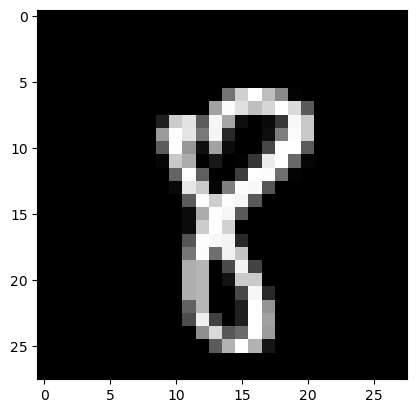

In [61]:
# Reshape the image data back to its original shape (28x28)
image = X_test[3707].reshape(28, 28)

# Display the image using plt.imshow()
plt.imshow(image, cmap='gray')
plt.show()